## Book Recommendation System

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Gettting Books data

In [2]:
df = pd.read_csv('books.csv')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [3]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [4]:
df = df.drop('Unnamed: 12', axis =1)

In [5]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df.shape

(11127, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
bookID                11127 non-null int64
title                 11127 non-null object
authors               11127 non-null object
average_rating        11127 non-null object
isbn                  11127 non-null object
isbn13                11127 non-null object
language_code         11127 non-null object
  num_pages           11127 non-null object
ratings_count         11127 non-null int64
text_reviews_count    11127 non-null int64
publication_date      11127 non-null object
publisher             11127 non-null object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [8]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [9]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [10]:
# Data is not having any null values

In [11]:
# Fixing the name of every Harry potter series to be just J.K. Rowling
df.replace(to_replace = 'J.K. Rowling/Mary GrandPrÃ©', value = 'J.K. Rowling', inplace =True)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


In [12]:
df['title'].value_counts()

The Iliad                                                                       9
The Brothers Karamazov                                                          9
Gulliver's Travels                                                              8
The Odyssey                                                                     8
Anna Karenina                                                                   8
                                                                               ..
John Carter of Mars (Barsoom #11)                                               1
The 10 Commandments of Parenting: The Do's and Don'ts for Raising Great Kids    1
The Ships of Earth (Homecoming Saga #3)                                         1
The Land of the Dead (Tales from the Odyssey  #2)                               1
Rock Star Superstar                                                             1
Name: title, Length: 10352, dtype: int64

### To check books with most occurences

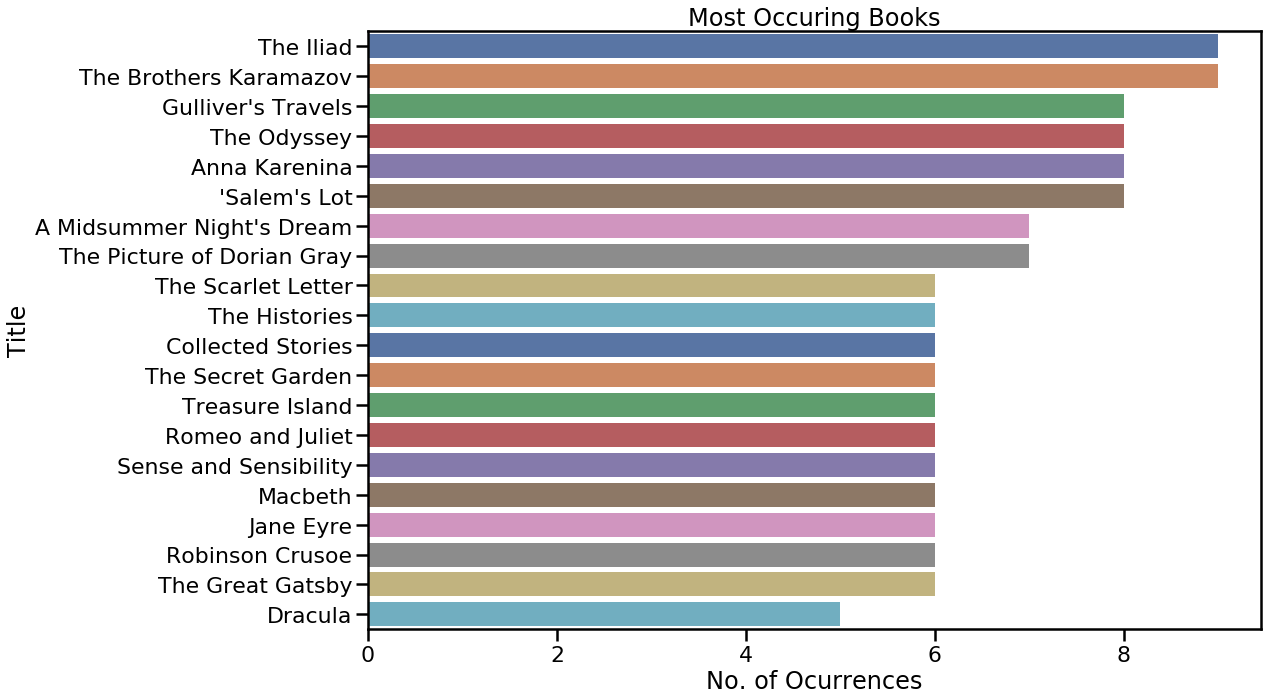

In [13]:
sns.set_context('poster')
plt.figure(figsize=(16,11))
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y= books.index, palette='deep')
plt.title('Most Occuring Books')
plt.xlabel('No. of Ocurrences')
plt.ylabel('Title')
plt.show()

We can see The Brothers karamazov and The lliad are most occured books

### Distribution of books according to language

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

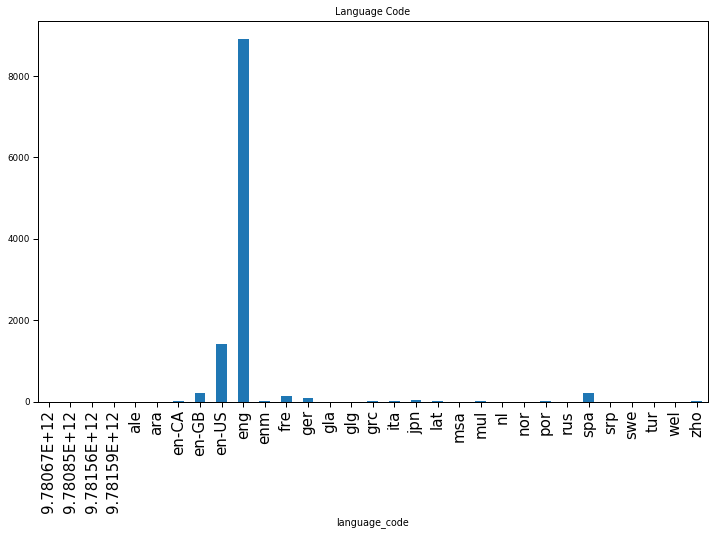

In [14]:
sns.set_context('paper')
plt.figure(figsize=(12,7))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)

Observation- Most of the books are in English and English-US language

## Top 10 most rated books

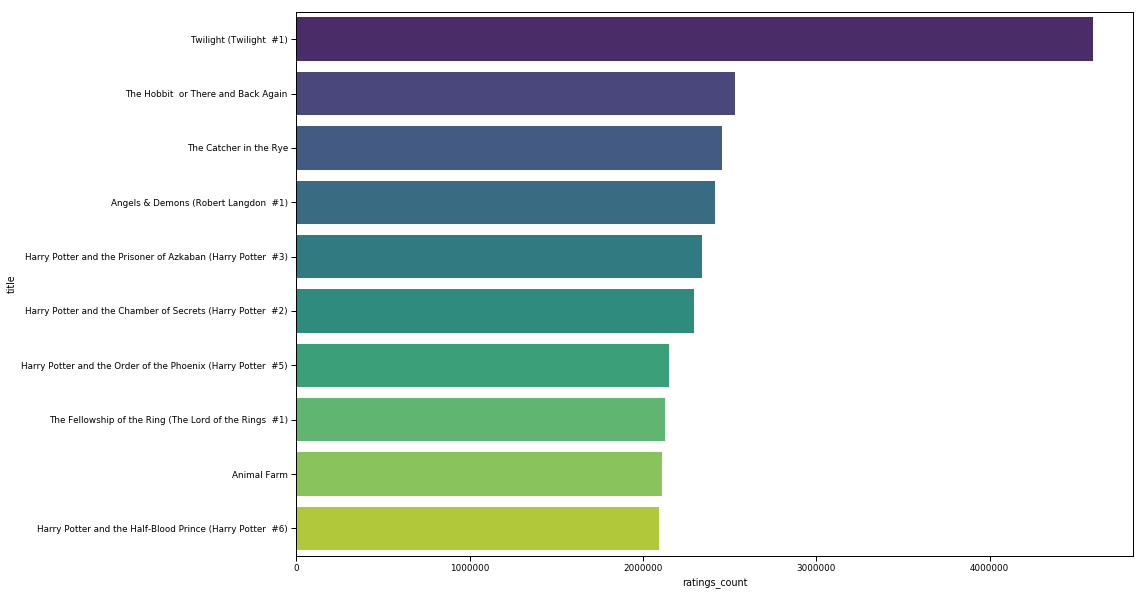

In [15]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'viridis')

<b>Observation</b> - Most rated books are <b>'Twilight #1'</b> & <b>'The Hobbit, Angels and demons'</b>

### Authors with most books

Text(0,0.5,'Authors')

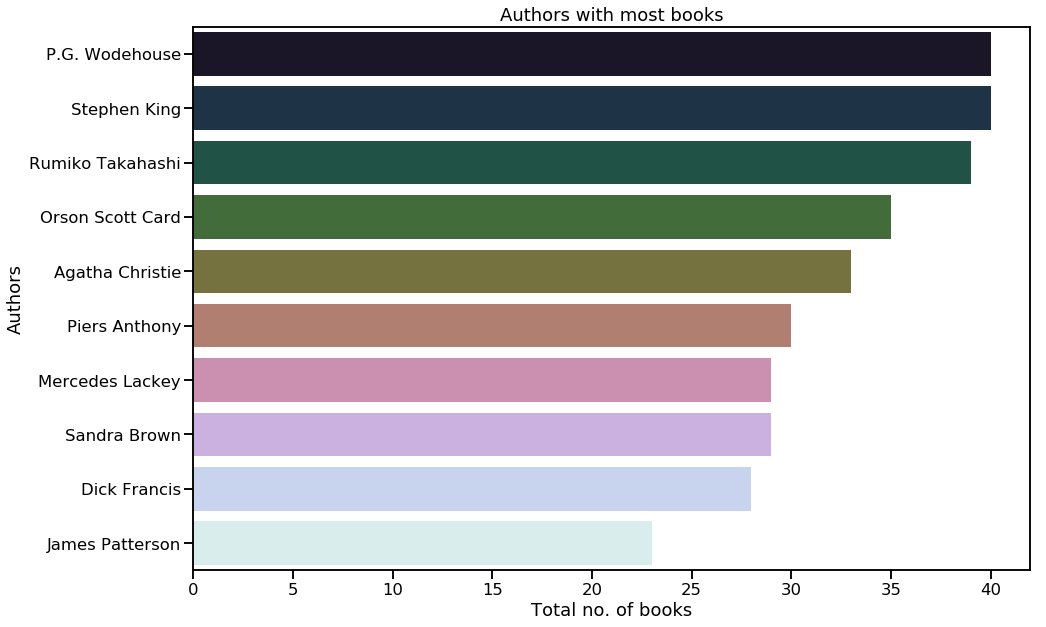

In [16]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
sns.barplot(most_books['title'], most_books.index, palette = 'cubehelix')
plt.title('Authors with most books')
plt.xlabel('Total no. of books')
plt.ylabel('Authors')

<b>Observation: 'P.G. Wodehouse' and 'Stephen King</b> has the most number of books i.e 40  

### Top 10 highly rated authors

Text(0,0.5,'Authors')

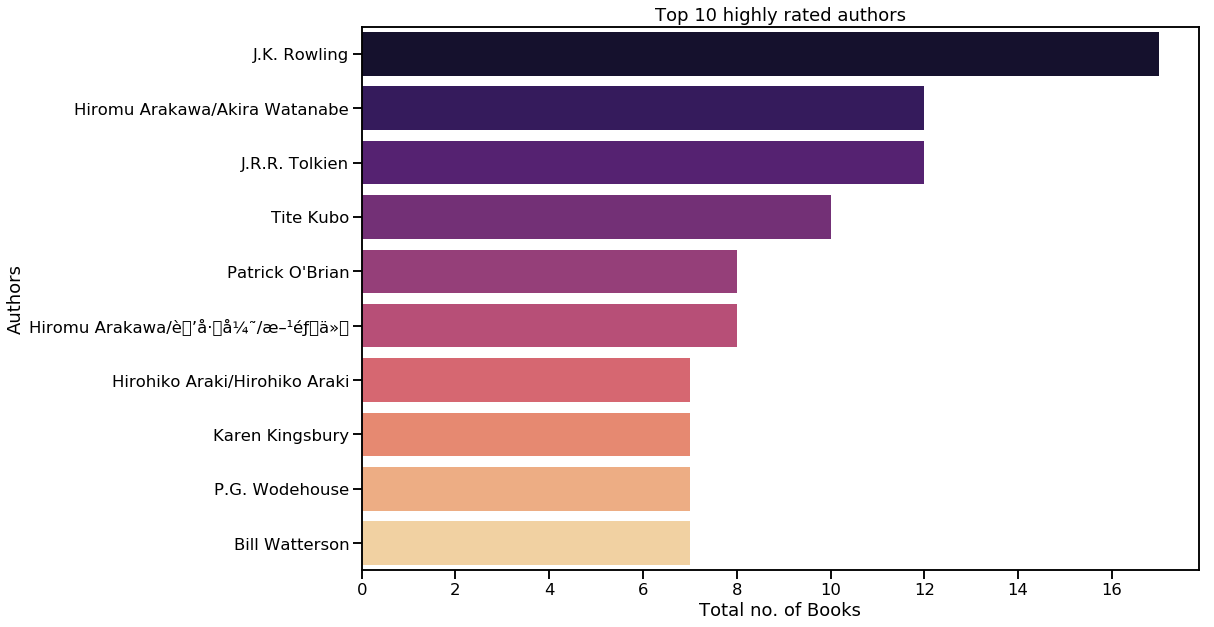

In [17]:
high_rated_author = df[df['average_rating']>= '4.3']
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize = (15,10))
sns.barplot(high_rated_author['title'], high_rated_author.index, palette = 'magma')
plt.title('Top 10 highly rated authors')
plt.xlabel('Total no. of Books')
plt.ylabel('Authors')

#Observation - J.K Rowling has the most ratings for his books

### Relationship between ratings &  Text Review counts

In [18]:
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
dtype: object

In [22]:
df['average_rating'] = df['average_rating'].apply(lambda x: pd.to_numeric(x, errors ='coerce'))

<Figure size 1080x720 with 0 Axes>

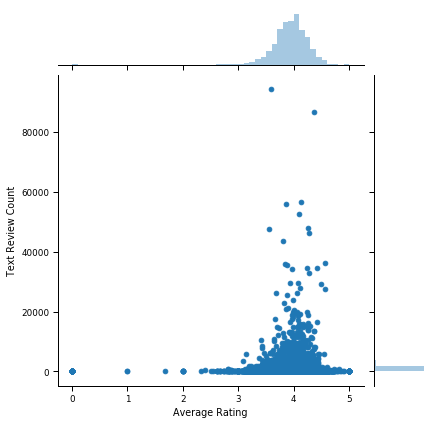

In [26]:
plt.figure(figsize=(15,10))
df.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data= df[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

In [27]:
df['  num_pages'] = df['  num_pages'].astype(str).astype(int)

In [28]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
  num_pages             int32
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

### Relationship between no. of pages and rating

<Figure size 1080x720 with 0 Axes>

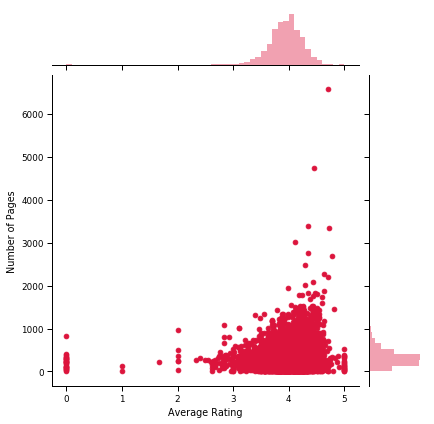

In [30]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="  num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [32]:
trial = df[~(df['  num_pages']>1000)] # having maximum density

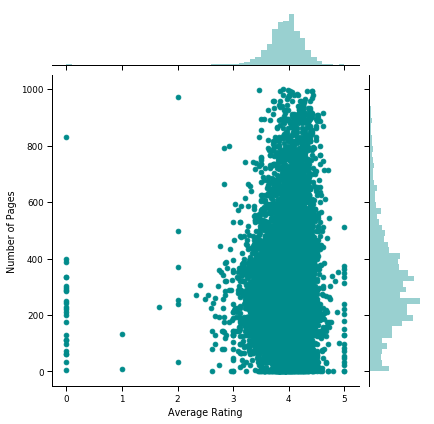

In [33]:
ax = sns.jointplot(x="average_rating", y="  num_pages", data = trial, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [34]:
# Observation - the highest ratings ever given, usually are for books with the page range of 200-400, 
# peaking near 250. It could lead to the fact that most of the people seem to prefer books with a moderate amount of pages, and that thicker books seems to scare people away.

### Relationship between ratings & ratings count

Text(336.971,0.5,'Ratings count')

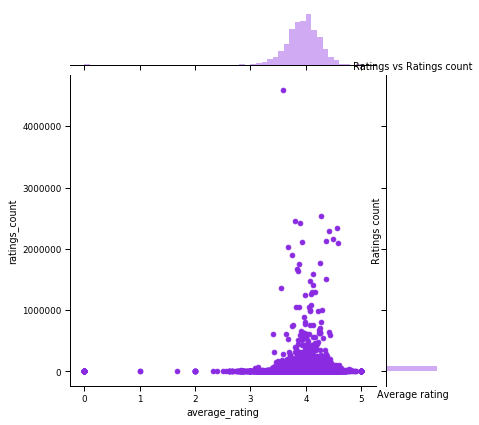

In [40]:
sns.jointplot(x = 'average_rating', y = 'ratings_count', data=df, color = 'blueviolet')
plt.title('Ratings vs Ratings count')
plt.xlabel('Average rating')
plt.ylabel('Ratings count')

### Recommendation system

We can create recommendation sytem by use of k nearest neighbors algorithm based on average ratings and Ratings count.
Based on the book entered by user the nearest neighbours to it would be classified as the books which the user might like.

### Creating a new feature for Ratings distribution

In [52]:
df.loc[ (df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = "between_0_to_1"
df.loc[ (df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = "between_1_to_2"
df.loc[ (df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = "between_2_to_3"
df.loc[ (df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = "between_3_to_4"
df.loc[ (df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = "between_4_to_5"

In [54]:
books_features = pd.concat([df['rating_between'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)
books_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,average_rating,ratings_count
0,0,0,0,0,1,4.57,2095690
1,0,0,0,0,1,4.49,2153167
2,0,0,0,0,1,4.42,6333
3,0,0,0,0,1,4.56,2339585
4,0,0,0,0,1,4.78,41428


In [55]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [56]:
# Using KNN model
from sklearn import neighbors
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
engine_model.fit(books_features)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=1.0)

In [57]:
dist, idlist = engine_model.kneighbors(books_features)

In [65]:
# Function to get similar books entered by user
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    print('book name index', book_id)
    book_id = book_id[0]
 #   print('book_id', book_id)
    for newid in idlist[book_id][1:]:
 #       print(newid)
        book_list_name.append(df.loc[newid].title)
 #       print(df.loc[newid].title) 
         
                
    return book_list_name

In [66]:
book_list_names = book_recommendation_engine('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
book_list_names


book name index Int64Index([0, 615], dtype='int64')


['Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harrius Potter et Philosophi Lapis',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 "Blue Shoes and Happiness (No. 1 Ladies' Detective Agency #7)"]

In [67]:
similar_books = book_recommendation_engine("The Catcher in the Rye")
similar_books

book name index Int64Index([1462], dtype='int64')


['Angels & Demons (Robert Langdon  #1)',
 'Animal Farm',
 'Lord of the Flies',
 'Lolita',
 'Of Mice and Men']